In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report, confusion_matrix,
    precision_score, recall_score, f1_score,
    accuracy_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/placementByGeolocation/placementByGeolocationApp/refs/heads/checkpoint3/df_cafes_.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9218 entries, 0 to 9217
Data columns (total 77 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   name                                  9218 non-null   object 
 1   type                                  9218 non-null   object 
 2   cuisine                               5636 non-null   object 
 3   website                               9218 non-null   int64  
 4   lat                                   9218 non-null   float64
 5   lon                                   9218 non-null   float64
 6   dgis_general_rating                   9218 non-null   float64
 7   dgis_general_review_count_with_stars  9218 non-null   float64
 8   dgis_org_rating                       9218 non-null   float64
 9   dgis_org_review_count                 9218 non-null   float64
 10  city                                  9218 non-null   object 
 11  brand            

In [3]:
df.head()

,name,type,cuisine,website,lat,lon,dgis_general_rating,dgis_general_review_count_with_stars,dgis_org_rating,dgis_org_review_count,...,nearest_gallery_name,other_attractions_100m,other_attractions_500m,other_attractions_1000m,parks_100m,parks_500m,parks_1000m,nearest_park,nearest_park_name,res_buildings_density_1000m
0,Salden's Taphouse,bar,NaN,1,55.765574,37.638976,4.9,129.0,4.8,252.0,...,Nadja Brykina Gallery,1,65,220,0,6,27,247.780090,Сквер «Огородная слобода»,132.416913
1,Com,cafe,vietnamese,0,55.768280,37.644618,3.5,12.0,4.5,164.0,...,Sare art,1,73,179,2,9,32,42.032631,(без названия),113.954939
2,Шоколадница,cafe,coffee_shop,1,55.738811,37.653006,2.4,170.0,3.1,10899.0,...,Краснохолмская,0,16,50,1,2,8,91.996504,(без названия),56.659160
3,Тануки,restaurant,japanese,1,55.728517,37.679155,4.9,527.0,4.8,24921.0,...,Здесь на Таганке,2,4,12,0,0,7,509.973891,(без названия),46.791553
4,Вареничная №1,restaurant,russian,1,55.732211,37.665123,4.1,201.0,4.1,3881.0,...,Краснохолмская,0,7,30,0,2,9,191.115200,(без названия),69.709865


In [4]:
df.isnull().sum()

,0
name,0
type,0
cuisine,3582
website,0
lat,0
...,...
parks_500m,0
parks_1000m,0
nearest_park,0
nearest_park_name,0


Распределение оценок:
dgis_general_rating
1.0     69
1.1      6
1.2      7
1.3      9
1.4     23
1.5      5
1.6      7
1.7     16
1.8     10
1.9     16
2.0     26
2.1     35
2.2     36
2.3     53
2.4     59
2.5     58
2.6     58
2.7     75
2.8     75
2.9    100
3.0    140
3.1    115
3.2    114
3.3    125
3.4    131
3.5    145
3.6    174
3.7    234
3.8    205
3.9    249
4.0    337
4.1    304
4.2    411
4.3    527
4.4    625
4.5    771
4.6    843
4.7    788
4.8    711
4.9    607
5.0    919
Name: count, dtype: int64


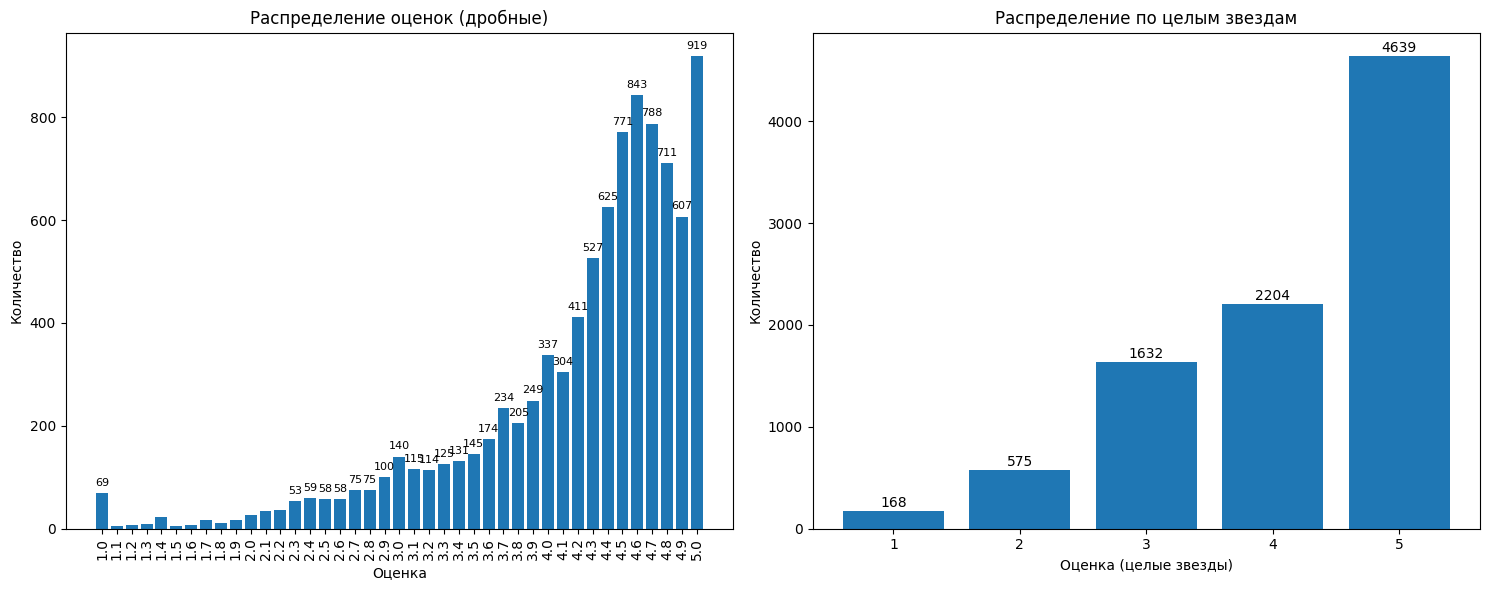


=== АНАЛИЗ ДЛЯ ОБЪЕДИНЕНИЯ КЛАССОВ ===
Всего уникальных оценок: 41

Распределение по группам:
1-1.9 звезд: 168 записей (1.8%)
2-2.9 звезд: 575 записей (6.2%)
3-3.9 звезд: 1632 записей (17.7%)
4-4.9 звезд: 5924 записей (64.3%)
5 звезд: 919 записей (10.0%)

=== СТРАТЕГИЯ 1: ОКРУГЛЕНИЕ ДО ЦЕЛЫХ ===
После округления:
  1.0 звезд: 114 записей
  2.0 звезд: 321 записей
  3.0 звезд: 933 записей
  4.0 звезд: 3982 записей
  5.0 звезд: 3868 записей

=== СТРАТЕГИЯ 2: ГРУППИРОВКА В 3 КАТЕГОРИИ ===
Группировка в 3 категории:
rating_3cat
high      6843
medium    1632
low        743
Name: count, dtype: int64

=== СТРАТЕГИЯ 3: ГРУППИРОВКА В 4 КАТЕГОРИИ ===
Группировка в 4 категории:
rating_4cat
high           4639
medium_high    2204
medium_low     1632
low             743
Name: count, dtype: int64

=== СТРАТЕГИЯ 4: ДРОБНЫЕ ОЦЕНКИ ===
Всего 41 уникальных оценок (слишком много для классификации)


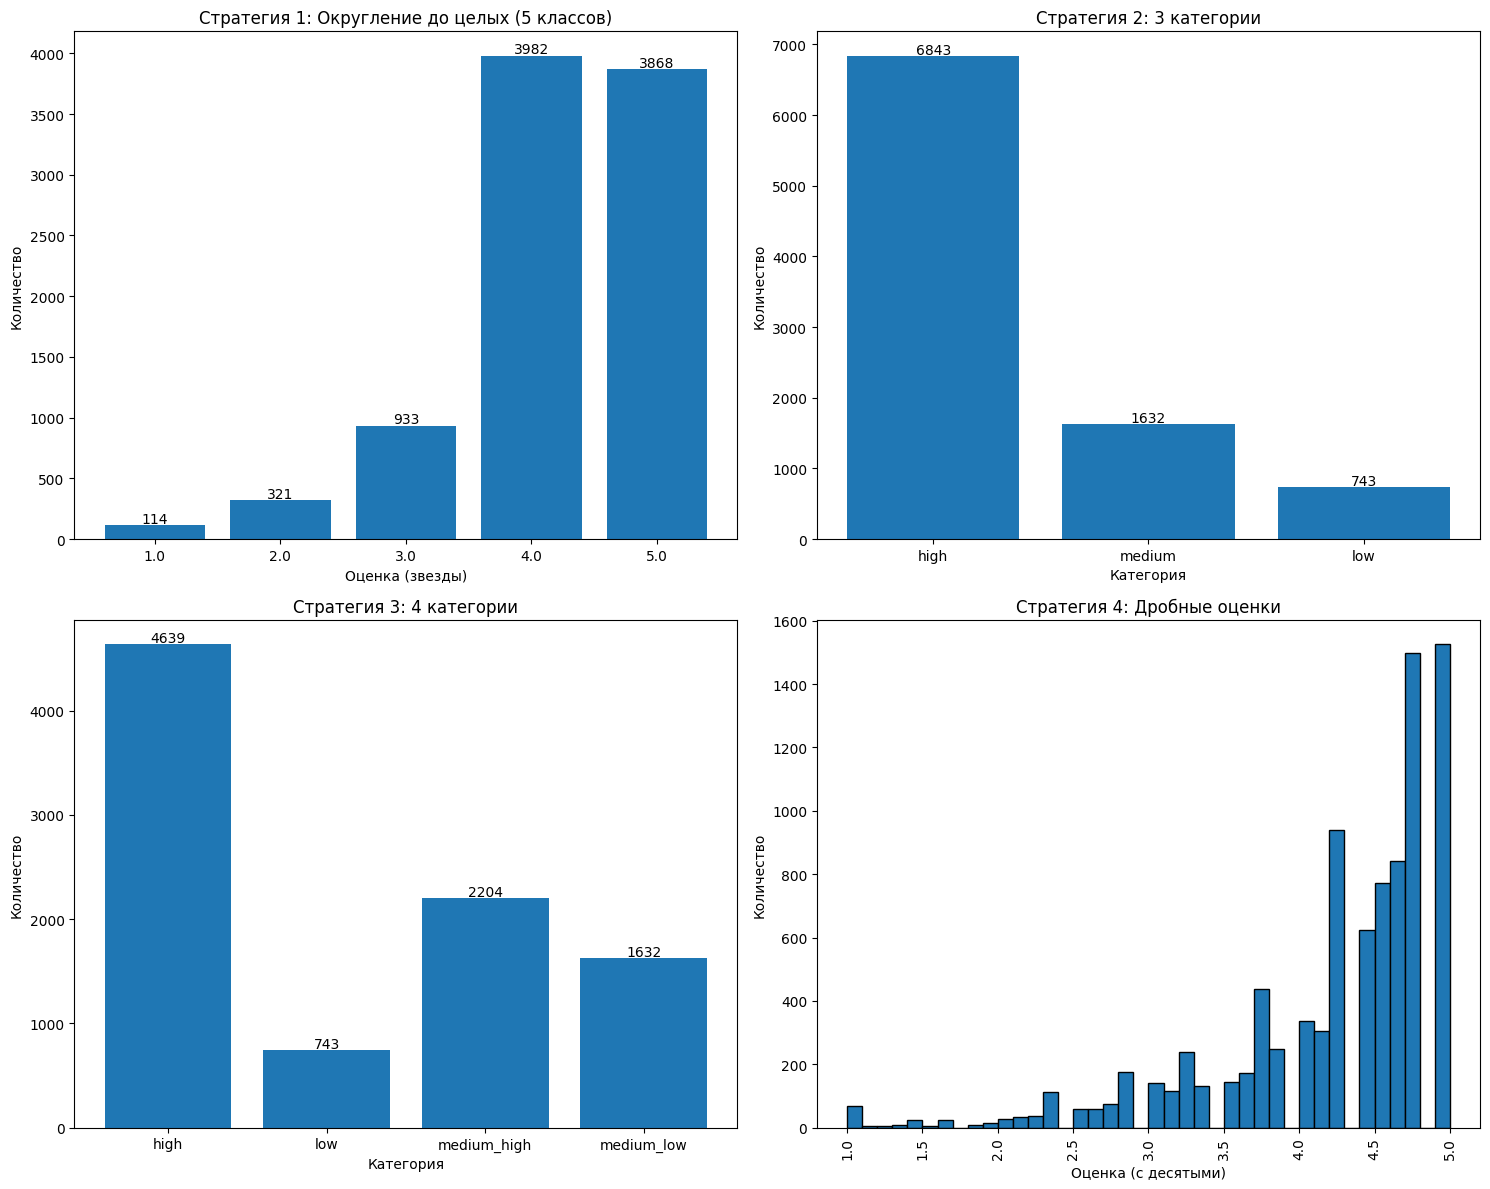


Кодирование категорий:
  Класс 0: excellent_45_5 (4.5-5.0 звезд) - 4639 записей
  Класс 1: good_4_45 (4.0-4.4 звезд) - 2204 записей
  Класс 2: low_1_3 (1.0-2.9 звезд) - 743 записей
  Класс 3: medium_3_4 (3.0-3.9 звезд) - 1632 записей

Всего классов: 4
Распределение по классам:
rating_encoded
0    4639
1    2204
2     743
3    1632
Name: count, dtype: int64


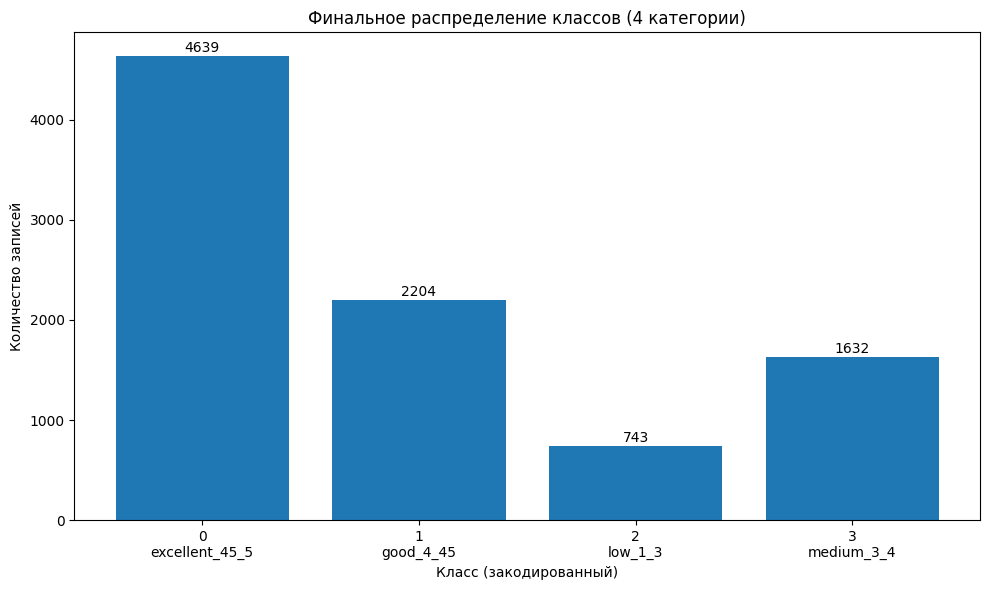

In [5]:
print("Распределение оценок:")
rating_dist = df['dgis_general_rating'].value_counts().sort_index()
print(rating_dist)

# Визуализация исходного распределения
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
bars = plt.bar(rating_dist.index.astype(str), rating_dist.values)
plt.title('Распределение оценок (дробные)')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.xticks(rotation=90)
for bar in bars:
    height = bar.get_height()
    if height > 50:  # Чтобы не загромождать график
        plt.text(bar.get_x() + bar.get_width()/2., height + 10,
                f'{int(height)}', ha='center', va='bottom', fontsize=8)

plt.subplot(1, 2, 2)
# Суммируем по целым звездам для сравнения
rating_int = df['dgis_general_rating'].apply(lambda x: int(x) if x < 4.5 else 5)
rating_int_dist = rating_int.value_counts().sort_index()
bars = plt.bar(rating_int_dist.index.astype(str), rating_int_dist.values)
plt.title('Распределение по целым звездам')
plt.xlabel('Оценка (целые звезды)')
plt.ylabel('Количество')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10,
            f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Анализ распределения для определения стратегии объединения
print("\n=== АНАЛИЗ ДЛЯ ОБЪЕДИНЕНИЯ КЛАССОВ ===")
print(f"Всего уникальных оценок: {len(rating_dist)}")

# Создаем группы для анализа
rating_groups = {
    '1-1.9 звезд': df[df['dgis_general_rating'] < 2.0].shape[0],
    '2-2.9 звезд': df[(df['dgis_general_rating'] >= 2.0) & (df['dgis_general_rating'] < 3.0)].shape[0],
    '3-3.9 звезд': df[(df['dgis_general_rating'] >= 3.0) & (df['dgis_general_rating'] < 4.0)].shape[0],
    '4-4.9 звезд': df[(df['dgis_general_rating'] >= 4.0) & (df['dgis_general_rating'] < 5.0)].shape[0],
    '5 звезд': df[df['dgis_general_rating'] == 5.0].shape[0]
}

print("\nРаспределение по группам:")
for group, count in rating_groups.items():
    print(f"{group}: {count} записей ({count/len(df)*100:.1f}%)")

# Стратегия 1: Округление до целых и объединение редких классов
print("\n=== СТРАТЕГИЯ 1: ОКРУГЛЕНИЕ ДО ЦЕЛЫХ ===")
df['rating_rounded'] = df['dgis_general_rating'].round()
rounded_dist = df['rating_rounded'].value_counts().sort_index()
print("После округления:")
for rating, count in rounded_dist.items():
    print(f"  {rating} звезд: {count} записей")

# Стратегия 2: Группировка в 3 основные категории
print("\n=== СТРАТЕГИЯ 2: ГРУППИРОВКА В 3 КАТЕГОРИИ ===")
def categorize_rating_3(x):
    if x < 3.0:
        return 'low'      # Низкие оценки (1-2.9)
    elif x < 4.0:
        return 'medium'   # Средние оценки (3-3.9)
    else:
        return 'high'     # Высокие оценки (4-5)

df['rating_3cat'] = df['dgis_general_rating'].apply(categorize_rating_3)
print("Группировка в 3 категории:")
print(df['rating_3cat'].value_counts())

# Стратегия 3: Группировка в 4 категории
print("\n=== СТРАТЕГИЯ 3: ГРУППИРОВКА В 4 КАТЕГОРИИ ===")
def categorize_rating_4(x):
    if x < 3.0:
        return 'low'          # 1-2.9 звезды
    elif x < 4.0:
        return 'medium_low'   # 3-3.9 звезды
    elif x < 4.5:
        return 'medium_high'  # 4-4.4 звезды
    else:
        return 'high'         # 4.5-5 звезд

df['rating_4cat'] = df['dgis_general_rating'].apply(categorize_rating_4)
print("Группировка в 4 категории:")
print(df['rating_4cat'].value_counts())

# Стратегия 4: Дробные оценки как отдельные классы (слишком много классов)
print("\n=== СТРАТЕГИЯ 4: ДРОБНЫЕ ОЦЕНКИ ===")
# Округляем до десятых и создаем категории
df['rating_tenths'] = df['dgis_general_rating'].round(1)
tenths_counts = df['rating_tenths'].value_counts().sort_index()
print(f"Всего {len(tenths_counts)} уникальных оценок (слишком много для классификации)")

# Визуализация всех стратегий
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Стратегия 1
axes[0, 0].bar(rounded_dist.index.astype(str), rounded_dist.values)
axes[0, 0].set_title('Стратегия 1: Округление до целых (5 классов)')
axes[0, 0].set_xlabel('Оценка (звезды)')
axes[0, 0].set_ylabel('Количество')
for i, (rating, count) in enumerate(rounded_dist.items()):
    axes[0, 0].text(i, count + 20, str(count), ha='center')

# Стратегия 2
cat3_counts = df['rating_3cat'].value_counts()
axes[0, 1].bar(cat3_counts.index, cat3_counts.values)
axes[0, 1].set_title('Стратегия 2: 3 категории')
axes[0, 1].set_xlabel('Категория')
axes[0, 1].set_ylabel('Количество')
for i, count in enumerate(cat3_counts.values):
    axes[0, 1].text(i, count + 20, str(count), ha='center')

# Стратегия 3
cat4_counts = df['rating_4cat'].value_counts().sort_index()
axes[1, 0].bar(cat4_counts.index, cat4_counts.values)
axes[1, 0].set_title('Стратегия 3: 4 категории')
axes[1, 0].set_xlabel('Категория')
axes[1, 0].set_ylabel('Количество')
for i, count in enumerate(cat4_counts.values):
    axes[1, 0].text(i, count + 20, str(count), ha='center')

# Стратегия 4
axes[1, 1].hist(df['rating_tenths'], bins=40, edgecolor='black')
axes[1, 1].set_title('Стратегия 4: Дробные оценки')
axes[1, 1].set_xlabel('Оценка (с десятыми)')
axes[1, 1].set_ylabel('Количество')
axes[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# Создаем финальную целевую переменную
def create_final_rating_category(x):
    """Создание финальных категорий для классификации"""
    if x < 3.0:
        return 'low_1_3'        # 1.0-2.9 звезды (наименьшие оценки)
    elif x < 4.0:
        return 'medium_3_4'     # 3.0-3.9 звезды
    elif x < 4.5:
        return 'good_4_45'      # 4.0-4.4 звезды
    else:
        return 'excellent_45_5' # 4.5-5.0 звезды (лучшие оценки)

df['rating_category'] = df['dgis_general_rating'].apply(create_final_rating_category)

# Кодируем целевую переменную
le = LabelEncoder()
df['rating_encoded'] = le.fit_transform(df['rating_category'])

# Создаем mapping для интерпретации
rating_mapping = dict(zip(le.transform(le.classes_), le.classes_))
print("\nКодирование категорий:")
for code, category in sorted(rating_mapping.items()):
    # Вычисляем диапазон оценок для каждой категории
    if category == 'low_1_3':
        min_val = df[df['rating_category'] == category]['dgis_general_rating'].min()
        max_val = df[df['rating_category'] == category]['dgis_general_rating'].max()
        count = df[df['rating_category'] == category].shape[0]
        print(f"  Класс {code}: {category} ({min_val:.1f}-{max_val:.1f} звезд) - {count} записей")
    elif category == 'medium_3_4':
        min_val = df[df['rating_category'] == category]['dgis_general_rating'].min()
        max_val = df[df['rating_category'] == category]['dgis_general_rating'].max()
        count = df[df['rating_category'] == category].shape[0]
        print(f"  Класс {code}: {category} ({min_val:.1f}-{max_val:.1f} звезд) - {count} записей")
    elif category == 'good_4_45':
        min_val = df[df['rating_category'] == category]['dgis_general_rating'].min()
        max_val = df[df['rating_category'] == category]['dgis_general_rating'].max()
        count = df[df['rating_category'] == category].shape[0]
        print(f"  Класс {code}: {category} ({min_val:.1f}-{max_val:.1f} звезд) - {count} записей")
    elif category == 'excellent_45_5':
        min_val = df[df['rating_category'] == category]['dgis_general_rating'].min()
        max_val = df[df['rating_category'] == category]['dgis_general_rating'].max()
        count = df[df['rating_category'] == category].shape[0]
        print(f"  Класс {code}: {category} ({min_val:.1f}-{max_val:.1f} звезд) - {count} записей")

print(f"\nВсего классов: {len(le.classes_)}")
print("Распределение по классам:")
class_dist = df['rating_encoded'].value_counts().sort_index()
print(class_dist)

# Визуализация финального распределения
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(class_dist)), class_dist.values)
plt.title('Финальное распределение классов (4 категории)')
plt.xlabel('Класс (закодированный)')
plt.ylabel('Количество записей')
plt.xticks(range(len(class_dist)), [f'{i}\n{rating_mapping[i]}' for i in range(len(class_dist))])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10,
            f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Сохраняем mapping для дальнейшего использования
target = 'rating_encoded'

# удаляем лишнее
df = df.drop(['rating_rounded', 'rating_3cat', 'rating_4cat', "rating_tenths"], axis=1)

В итоге разделим на 4 категории. Так разумнее всего

Теперь подготовим данные

In [6]:
print("=== ПОДГОТОВКА ПРИЗНАКОВ ===")

# Определяем категориальные и числовые признаки
categorical_cols = []
numeric_cols = []

# Создаем X и y
X = df.copy()
X = X.drop(['dgis_org_rating', 'dgis_general_rating', 'rating_category', 'rating_encoded'], axis=1)
y = df[target]

for col in X.columns:
      if df[col].dtype == 'object' or df[col].nunique() < 10:
          categorical_cols.append(col)
      elif df[col].dtype in ['int64', 'float64']:
          numeric_cols.append(col)

print(f"Категориальные признаки ({len(categorical_cols)}): {categorical_cols[:10]}...")
print(f"Числовые признаки ({len(numeric_cols)}): {numeric_cols[:10]}...")

print(f"\nX shape: {X.shape}, y shape: {y.shape}")
X.head()

=== ПОДГОТОВКА ПРИЗНАКОВ ===
Категориальные признаки (23): ['name', 'type', 'cuisine', 'website', 'city', 'brand', 'universities & colleges_100m', 'universities & colleges_500m', 'metro_stations_100m', 'metro_stations_500m']...
Числовые признаки (52): ['lat', 'lon', 'dgis_general_review_count_with_stars', 'dgis_org_review_count', 'direct_competitors_500m', 'direct_competitors_1000m', 'direct_competitors_100m', 'indirect_competitors_500m', 'indirect_competitors_1000m', 'indirect_competitors_100m']...

X shape: (9218, 75), y shape: (9218,)


,name,type,cuisine,website,lat,lon,dgis_general_review_count_with_stars,dgis_org_review_count,city,brand,...,nearest_gallery_name,other_attractions_100m,other_attractions_500m,other_attractions_1000m,parks_100m,parks_500m,parks_1000m,nearest_park,nearest_park_name,res_buildings_density_1000m
0,Salden's Taphouse,bar,NaN,1,55.765574,37.638976,129.0,252.0,Москва,single,...,Nadja Brykina Gallery,1,65,220,0,6,27,247.780090,Сквер «Огородная слобода»,132.416913
1,Com,cafe,vietnamese,0,55.768280,37.644618,12.0,164.0,Москва,Com,...,Sare art,1,73,179,2,9,32,42.032631,(без названия),113.954939
2,Шоколадница,cafe,coffee_shop,1,55.738811,37.653006,170.0,10899.0,Москва,Шоколадница,...,Краснохолмская,0,16,50,1,2,8,91.996504,(без названия),56.659160
3,Тануки,restaurant,japanese,1,55.728517,37.679155,527.0,24921.0,Москва,Тануки,...,Здесь на Таганке,2,4,12,0,0,7,509.973891,(без названия),46.791553
4,Вареничная №1,restaurant,russian,1,55.732211,37.665123,201.0,3881.0,Москва,Вареничная №1,...,Краснохолмская,0,7,30,0,2,9,191.115200,(без названия),69.709865


In [7]:
# ## 6. Обработка пропусков и кодирование

# Создаем пайплайн для предобработки
# Для числовых признаков: заполняем медианой и масштабируем
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# # Для категориальных: заполняем константой и one-hot кодируем
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'))
])

# # Объединяем трансформеры
preprocessor = ColumnTransformer(
  transformers=[
      ('num', numeric_transformer, numeric_cols),
      ('cat', categorical_transformer, categorical_cols)
])

In [8]:
# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

print("\nРаспределение классов в обучающей выборке:")
print(pd.Series(y_train).value_counts().sort_index())

print("\nРаспределение классов в тестовой выборке:")
print(pd.Series(y_test).value_counts().sort_index())

Обучающая выборка: (7374, 75)
Тестовая выборка: (1844, 75)

Распределение классов в обучающей выборке:
rating_encoded
0    3711
1    1763
2     594
3    1306
Name: count, dtype: int64

Распределение классов в тестовой выборке:
rating_encoded
0    928
1    441
2    149
3    326
Name: count, dtype: int64


In [9]:
# Функция для оценки модели
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    """Оценка модели с различными метриками"""

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказания
    y_pred = model.predict(X_test)

    # Метрики
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision_macro': precision_score(y_test, y_pred, average='macro', zero_division=0),
        'recall_macro': recall_score(y_test, y_pred, average='macro', zero_division=0),
        'f1_macro': f1_score(y_test, y_pred, average='macro', zero_division=0),
        'precision_micro': precision_score(y_test, y_pred, average='micro', zero_division=0),
        'recall_micro': recall_score(y_test, y_pred, average='micro', zero_division=0),
        'f1_micro': f1_score(y_test, y_pred, average='micro', zero_division=0)
    }

    # Отчет о классификации
    print(f"\n{'='*50}")
    print(f"МОДЕЛЬ: {model_name}")
    print(f"{'='*50}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"F1 Macro: {metrics['f1_macro']:.4f}")
    print(f"F1 Micro: {metrics['f1_micro']:.4f}")

    return metrics, model

# multinomial logistic regression

In [10]:
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        multi_class='multinomial',
        max_iter=1000,
        random_state=42
    ))
])

evaluate_model(
    lr_pipeline, X_train, y_train, X_test, y_test, "Logistic Regression"
)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 2, 5, 10, 13, 16, 17, 18, 22] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



МОДЕЛЬ: Logistic Regression
Accuracy: 0.5054
F1 Macro: 0.3635
F1 Micro: 0.5054


({'accuracy': 0.5054229934924078,
  'precision_macro': 0.3880990727107353,
  'recall_macro': 0.35997664265793256,
  'f1_macro': 0.3634963360204426,
  'precision_micro': 0.5054229934924078,
  'recall_micro': 0.5054229934924078,
  'f1_micro': 0.5054229934924078},
 Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('scaler',
                                                                    StandardScaler())]),
                                                   ['lat', 'lon',
                                                    'dgis_general_review_count_with_stars',
                                                    'dgis_org_review_count',
                                                    'direct_co

In [11]:
svm_base = LinearSVC(max_iter=10000, random_state=42, dual=False)
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', CalibratedClassifierCV(svm_base, method='sigmoid'))
])

evaluate_model(
    svm_pipeline, X_train, y_train, X_test, y_test, "Linear SVM"
)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 2, 5, 10, 13, 16, 17, 18, 22] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



МОДЕЛЬ: Linear SVM
Accuracy: 0.5228
F1 Macro: 0.2752
F1 Micro: 0.5228


({'accuracy': 0.5227765726681128,
  'precision_macro': 0.43108452236980876,
  'recall_macro': 0.3025868398216871,
  'f1_macro': 0.2752215267324475,
  'precision_micro': 0.5227765726681128,
  'recall_micro': 0.5227765726681128,
  'f1_micro': 0.5227765726681128},
 Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('scaler',
                                                                    StandardScaler())]),
                                                   ['lat', 'lon',
                                                    'dgis_general_review_count_with_stars',
                                                    'dgis_org_review_count',
                                                    'direct_co

In [12]:
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

evaluate_model(
    knn_pipeline, X_train, y_train, X_test, y_test, "K-Nearest Neighbors"
)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 2, 5, 10, 13, 16, 17, 18, 22] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



МОДЕЛЬ: K-Nearest Neighbors
Accuracy: 0.4566
F1 Macro: 0.2834
F1 Micro: 0.4566


({'accuracy': 0.4566160520607375,
  'precision_macro': 0.3120919877393332,
  'recall_macro': 0.28968112048306743,
  'f1_macro': 0.283425396775546,
  'precision_micro': 0.4566160520607375,
  'recall_micro': 0.4566160520607375,
  'f1_micro': 0.4566160520607375},
 Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('scaler',
                                                                    StandardScaler())]),
                                                   ['lat', 'lon',
                                                    'dgis_general_review_count_with_stars',
                                                    'dgis_org_review_count',
                                                    'direct_com

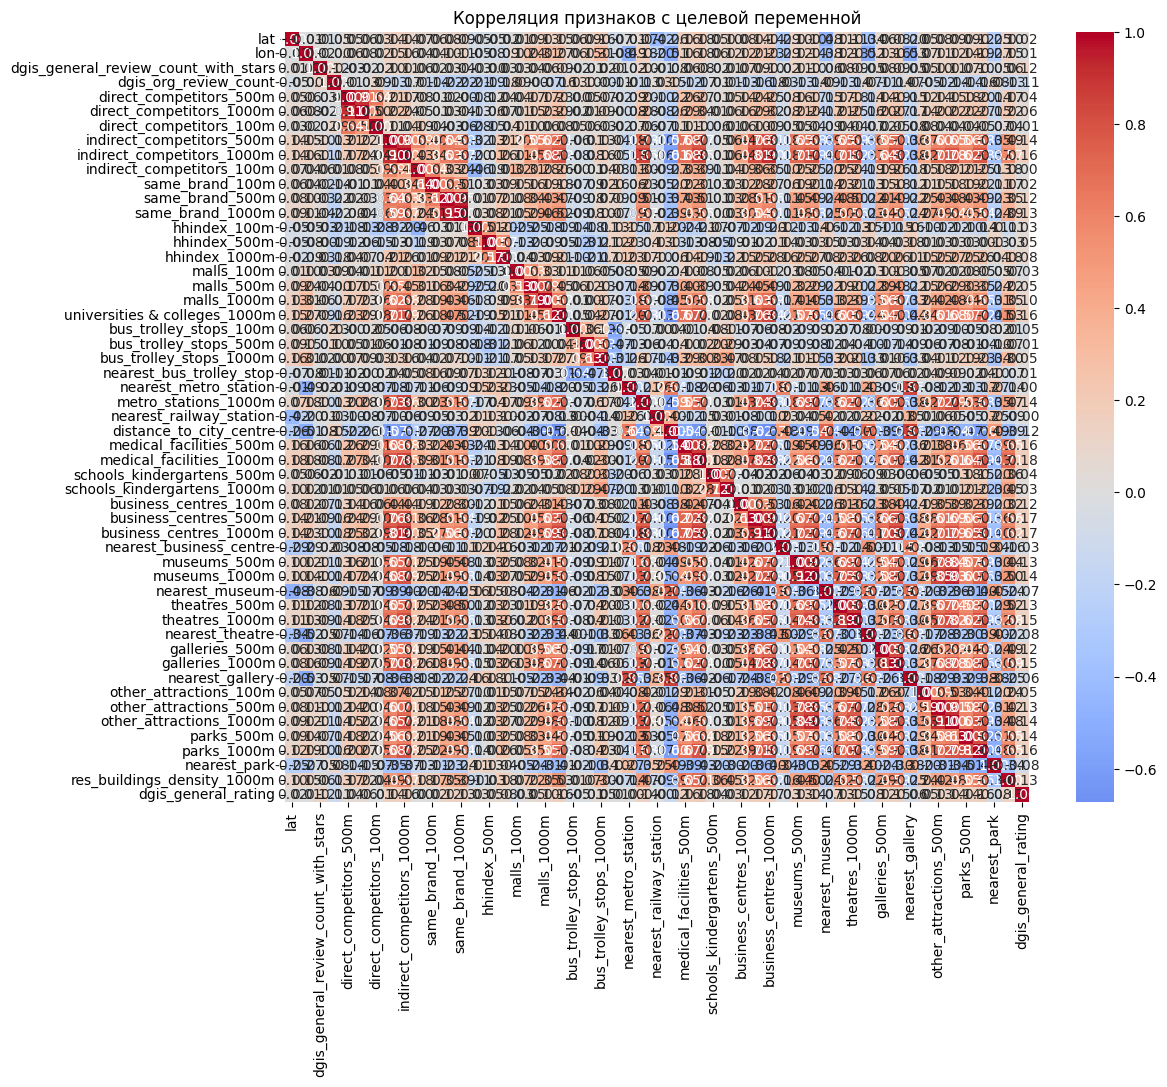

In [13]:
numeric_cols_with_target = numeric_cols + ['dgis_general_rating']
correlation_matrix = df[numeric_cols_with_target].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Корреляция признаков с целевой переменной')
plt.show()

array([[<Axes: title={'center': 'website'}>,
        <Axes: title={'center': 'lat'}>, <Axes: title={'center': 'lon'}>,
        <Axes: title={'center': 'dgis_general_review_count_with_stars'}>,
        <Axes: title={'center': 'dgis_org_review_count'}>,
        <Axes: title={'center': 'direct_competitors_500m'}>,
        <Axes: title={'center': 'direct_competitors_1000m'}>,
        <Axes: title={'center': 'direct_competitors_100m'}>],
       [<Axes: title={'center': 'indirect_competitors_500m'}>,
        <Axes: title={'center': 'indirect_competitors_1000m'}>,
        <Axes: title={'center': 'indirect_competitors_100m'}>,
        <Axes: title={'center': 'same_brand_100m'}>,
        <Axes: title={'center': 'same_brand_500m'}>,
        <Axes: title={'center': 'same_brand_1000m'}>,
        <Axes: title={'center': 'hhindex_100m'}>,
        <Axes: title={'center': 'hhindex_500m'}>],
       [<Axes: title={'center': 'hhindex_1000m'}>,
        <Axes: title={'center': 'malls_100m'}>,
        <Axes

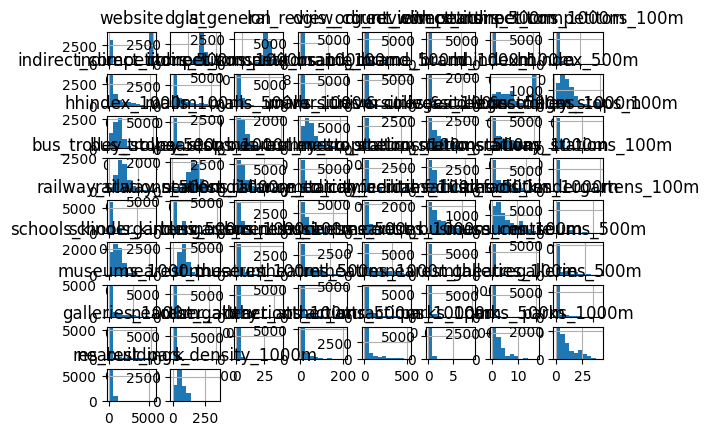

In [14]:
X_train.hist()

Топ-10 признаков по корреляции с рейтингом:
dgis_general_rating              1.000000
dgis_org_rating                  0.793669
rating_encoded                   0.766169
medical_facilities_1000m         0.175471
business_centres_1000m           0.174618
business_centres_500m            0.168254
indirect_competitors_1000m       0.164929
medical_facilities_500m          0.157917
universities & colleges_1000m    0.157121
parks_1000m                      0.156943
dtype: float64


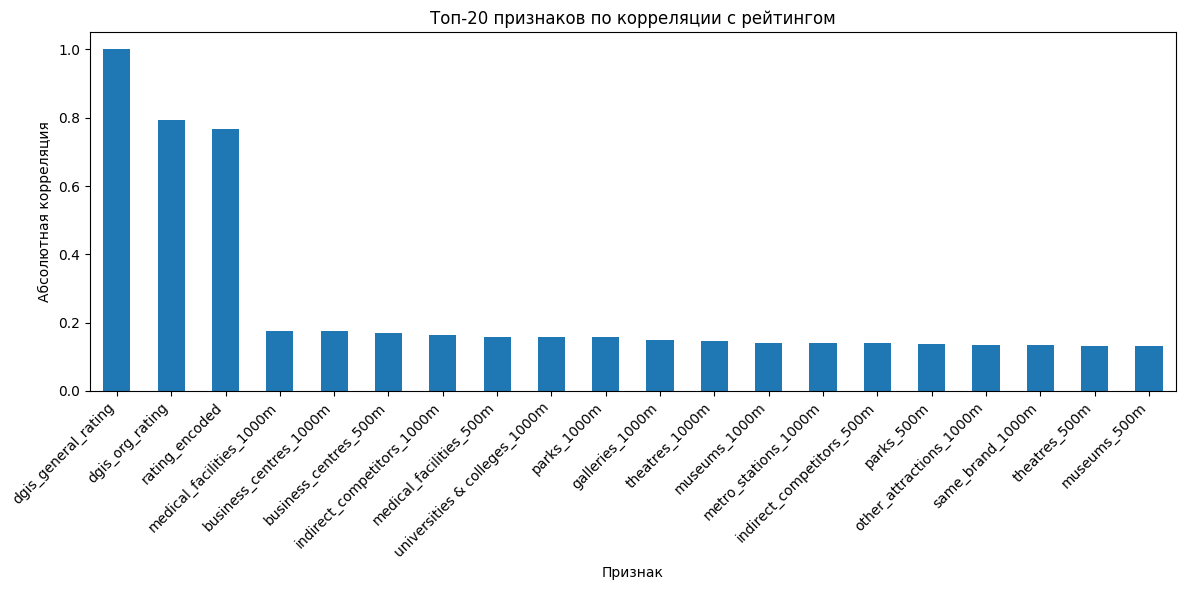

In [17]:
if 'dgis_org_rating' in df.columns:
    # Выбираем только числовые признаки
    numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

    # Считаем корреляцию с целевой переменной
    correlations = df[numeric_features].corrwith(df['dgis_general_rating']).abs().sort_values(ascending=False)

    print("Топ-10 признаков по корреляции с рейтингом:")
    print(correlations.head(10))

    # Визуализация
    plt.figure(figsize=(12, 6))
    correlations.head(20).plot(kind='bar')
    plt.title('Топ-20 признаков по корреляции с рейтингом')
    plt.xlabel('Признак')
    plt.ylabel('Абсолютная корреляция')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()